## Author: Makayla McKibben
### Course: DSC 550 Data Mining
### Exercise 4.2 Predicting Fuel Efficiency
### Date: 09.20.2024

In [512]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

In [513]:
# Import data
auto_mpg = pd.read_csv('auto-mpg.csv')

Ensure data is imported correctly

In [515]:
type(auto_mpg)

pandas.core.frame.DataFrame

In [516]:
auto_mpg.shape

(398, 9)

In [517]:
auto_mpg.head(8)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii


In [518]:
# Remove car name column from dataframe
auto_mpg.drop('car name', axis = 1, inplace = True)

In [519]:
# Verify car name has been removed
auto_mpg.shape

(398, 8)

In [520]:
# Check the type of the first value in the horsepower column
type(auto_mpg['horsepower'][0])

str

The dataframe has question marks at points in the horsepower column, this is why it set the series to a string.

In [522]:
# Find the values where horsepower has been entered as a question mark
auto_mpg[auto_mpg['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [523]:
# Convert all question marks to not a number in a new column
auto_mpg['horsepower_int'] = auto_mpg['horsepower'].replace('?', np.NaN)

In [524]:
# Check that the question mark has been changed
auto_mpg['horsepower_int'][32]

nan

In [525]:
# Convert the horsepower_int column to float
auto_mpg['horsepower_int'] = auto_mpg['horsepower_int'].astype(float)

In [526]:
# Calculate the mean of the horsepower_int column
mpg_mean = np.mean(auto_mpg['horsepower_int'])

In [527]:
# Replace all not a number values in the horsepower_int column with the mean from the rest of the series
auto_mpg['horsepower_int'] = auto_mpg['horsepower_int'].replace(np.NaN, mpg_mean)

In [528]:
# Verify it's been updated
auto_mpg['horsepower_int'][32]

104.46938775510205

In [529]:
# Change the original horsepower column to the horsepower_int column
auto_mpg['horsepower'] = auto_mpg['horsepower_int']

In [530]:
# Remove the horsepower_int column and leave the updated horsepower column in place
auto_mpg.drop('horsepower_int', axis = 1, inplace = True)

In [531]:
# See how many dummy variables to create
auto_mpg['origin'].unique()

array([1, 3, 2], dtype=int64)

In [532]:
# Create dummy variable
dummies = pd.get_dummies(auto_mpg['origin'])
dummies

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
393,True,False,False
394,False,True,False
395,True,False,False
396,True,False,False


In [533]:
# Append the dummy variable to the dataframe
auto_mpg = pd.concat([auto_mpg, dummies], axis = 1)

In [534]:
# Verify the columns have been added
auto_mpg.shape

(398, 11)

In [535]:
# Make sure the column names are strings
auto_mpg.columns = auto_mpg.columns.astype(str)

In [536]:
# Find the correlation coefficient of each variable interaction
corco_matrix = auto_mpg.corr()

In [537]:
# Display the matrix
print(corco_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771437 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.838939  0.896017   
displacement -0.804203   0.950721      1.000000    0.893646  0.932824   
horsepower   -0.771437   0.838939      0.893646    1.000000  0.860574   
weight       -0.831741   0.896017      0.932824    0.860574  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684259 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411651 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.453669 -0.581024   
1            -0.568192   0.604351      0.651407    0.486083  0.598398   
2             0.259022  -0.352861     -0.373886   -0.281258 -0.298843   
3             0.442174  -0.396479     -0.433505   -0.321325 -0.440817   

              acceleration  model year    origin         1         2         3  
mpg               0.420289    0.579267  0.

The features weight, displacement, cylinders, and horsepower are all relatively highly correlated with mpg in decreasing order. They are negatively correlated so we know that as these values increase, mpg will decrease.

<function matplotlib.pyplot.show(close=None, block=None)>

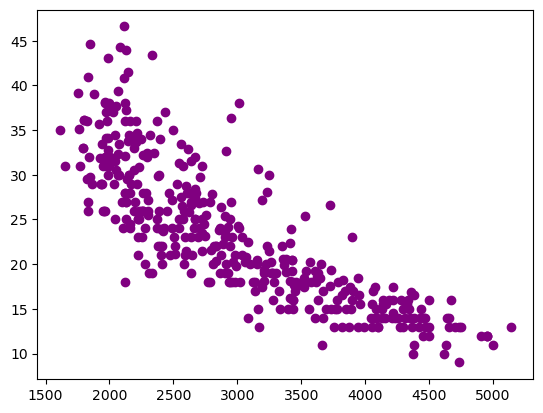

In [539]:
# Plot the weight vs. mpg from the dataframe
plt.plot(auto_mpg['weight'], auto_mpg['mpg'], 'o', color = 'purple')
plt.show

This plot shows us the negative correlation between weight and mpg. As weight increases mpg decreases. Because the data points are relatively tight together and have a defined shape we know our correlation is relatively high.

In [541]:
# Set the value we'll be using for targets for our model 
target = auto_mpg['mpg']

In [542]:
# Remove the mpg column from the dataframe
auto_mpg.drop('mpg', axis = 1, inplace = True)

In [543]:
# Set the value we'll use for our model
features = auto_mpg

In [544]:
# Verify the df is how we expect it to be
features

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,1,2,3
0,8,307.0,130.0,3504,12.0,70,1,True,False,False
1,8,350.0,165.0,3693,11.5,70,1,True,False,False
2,8,318.0,150.0,3436,11.0,70,1,True,False,False
3,8,304.0,150.0,3433,12.0,70,1,True,False,False
4,8,302.0,140.0,3449,10.5,70,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,True,False,False
394,4,97.0,52.0,2130,24.6,82,2,False,True,False
395,4,135.0,84.0,2295,11.6,82,1,True,False,False
396,4,120.0,79.0,2625,18.6,82,1,True,False,False


In [545]:
# Split the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 18)

In [546]:
# Create linear regression object
regressor = LinearRegression()

In [547]:
# Fit the regression model
regressor.fit(features_train, target_train)

LinearRegression()

In [548]:
# Make predictions using our linear model
lin_pred_test = regressor.predict(features_test)

In [549]:
# Make predictions using our linear model
lin_pred_train = regressor.predict(features_train)

In [550]:
# Find R^2 value for goodness of fit and percentage that accounts for variation
r2_score(target_train, lin_pred_train)

0.8205165716204168

In [551]:
# Find R^2 value for goodness of fit and percentage that accounts for variation
r2_score(target_test, lin_pred_test)

0.8347534844575031

In [552]:
# Find RMSE for information about the residuals
root_mean_squared_error(target_train, lin_pred_train)

3.2714635670095378

In [553]:
# Find RMSE for information about the residuals
root_mean_squared_error(target_test, lin_pred_test)

3.3045774803410826

In [554]:
# Find MAE for information about accuracy
mean_absolute_error(target_train, lin_pred_train)

2.5205876615280776

In [555]:
# Find MAE for information about accuracy
mean_absolute_error(target_test, lin_pred_test)

2.5404502105613718

In [556]:
# Create the pipeline for a polynomial model
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression(fit_intercept=False))])

In [557]:
# Train the model on the data
model.fit(features_train, target_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [558]:
# Make predictions using our polynomial model
poly_pred_test = model.predict(features_test)

In [559]:
# Make predictions using our polynomial model
poly_pred_train = model.predict(features_train)

In [560]:
# Find R^2 value for goodness of fit and percentage that accounts for variation
r2_score(target_train, poly_pred_train)

0.9090326075535009

In [561]:
# Find R^2 value for goodness of fit and percentage that accounts for variation
r2_score(target_test, poly_pred_test)

0.8586253783080194

In [562]:
# Find RMSE for information about the residuals
root_mean_squared_error(target_train, poly_pred_train)

2.3290176662857918

In [563]:
# Find RMSE for information about the residuals
root_mean_squared_error(target_test, poly_pred_test)

3.0565782017825596

In [564]:
# Find MAE for information about accuracy
mean_absolute_error(target_train, poly_pred_train)

1.6823858166245285

In [565]:
# Find MAE for information about accuracy
mean_absolute_error(target_test, poly_pred_test)

2.1887636936386117

The metrics R2, RMSE, and MAE can tell us about how well our model fits. The linear model has an R2 of 0.83 for the test data and that means the model accounts for 83% of the variation we see in the y values with x, the polynomial model of degree two accounts for 85%. An RMSE of 2-3 indicates that the residuals we're seeing from our model are relatively small. And an MAE that small tells us that our predicted values are relatively accurate. The polynomial model performed better than the linear fit in all metrics. Seeing the polynomial model perform better, I'd like to see if ridge or lasso regressions would be a better fit for this dataset than just linear.